In [1]:
import pandas as pd

df = pd.read_csv('train.csv')

/Users/vincewong/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (30) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
print(len(df))

33538


In [3]:
df.columns

Index(['id', 'name', 'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'host_id', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'country_code', 'country', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_ch

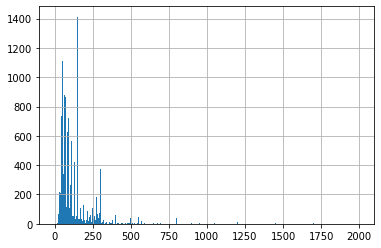

In [4]:
df['price'].hist(bins = 1000)

In [5]:
from math import isnan

def to_float(s):
    try:
        ret = float(s)
    except:
        ret = -1
    if isnan(ret):
        ret = -1
    return ret

def to_int(s):
    try:
        ret = int(s)
    except:
        ret = -1
    return ret

categories = [x for x in list(set(df['neighbourhood_group_cleansed'])) if type(x) is str]
print(len(categories))

def create_feature(row):
    guest_num = to_int(row.guests_included)
    guest_cap = to_int(row.extra_people)
    bedrooms = to_int(row.bedrooms)
    bathrooms = to_int(row.bathrooms)
    review = to_float(row.review_scores_rating)
    one_hot = [int(row.neighbourhood_group_cleansed == category) for category in categories]
    
    return [guest_num, guest_cap, bedrooms, bathrooms, review] + one_hot

train_X, train_y = [], []
for (idx, row) in df.iterrows():
    price = float(row.price)
    feature = create_feature(row)

    train_X.append(feature)
    train_y.append(price)

print(len(train_X), len(train_y))

5
33538 33538


In [6]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
import pandas as pd

test_df = pd.read_csv('test.csv')
test_df.shape

/Users/vincewong/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (30) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(17337, 64)

In [15]:
test_ids, test_X = [], []
for (idx, row) in test_df.iterrows():
    feature = create_feature(row)
    test_ids.append(row.id)
    test_X.append(feature)
test_y = regr.predict(test_X)
test_X

[[1, -1, 2, 2, -1, 0, 0, 1, 0, 0],
 [1, -1, 2, 1, 97.0, 1, 0, 0, 0, 0],
 [1, -1, 1, 1, 100.0, 0, 0, 1, 0, 0],
 [1, -1, 1, 1, 83.0, 1, 0, 0, 0, 0],
 [2, -1, 1, 2, 74.0, 1, 0, 0, 0, 0],
 [1, -1, 1, 1, 97.0, 0, 0, 1, 0, 0],
 [1, -1, 0, 1, -1, 0, 0, 1, 0, 0],
 [3, -1, 2, 1, 100.0, 0, 0, 1, 0, 0],
 [6, -1, 3, 2, 100.0, 1, 0, 0, 0, 0],
 [1, -1, 1, 1, -1, 0, 0, 1, 0, 0],
 [1, -1, 1, 1, 100.0, 0, 1, 0, 0, 0],
 [1, -1, 1, 1, 90.0, 0, 0, 1, 0, 0],
 [3, -1, 1, 1, 97.0, 1, 0, 0, 0, 0],
 [1, -1, 1, 1, 91.0, 1, 0, 0, 0, 0],
 [1, -1, 1, 1, 99.0, 0, 0, 1, 0, 0],
 [1, -1, 0, 1, -1, 0, 0, 1, 0, 0],
 [1, -1, 1, 1, 96.0, 0, 0, 1, 0, 0],
 [1, -1, 2, 1, 83.0, 1, 0, 0, 0, 0],
 [1, -1, 2, 2, 100.0, 0, 1, 0, 0, 0],
 [1, -1, 1, 1, -1, 0, 0, 1, 0, 0],
 [1, -1, 1, 1, -1, 0, 0, 1, 0, 0],
 [1, -1, 0, 1, 100.0, 1, 0, 0, 0, 0],
 [1, -1, 2, 1, 99.0, 0, 0, 1, 0, 0],
 [1, -1, 1, 1, 100.0, 0, 1, 0, 0, 0],
 [1, -1, 1, 1, 75.0, 0, 0, 1, 0, 0],
 [1, -1, 1, 1, -1, 0, 0, 1, 0, 0],
 [1, -1, 1, 1, -1, 1, 0, 0, 0, 0],
 [1, -1, 1

In [9]:
print(len(test_y))

17337


In [10]:
output_df = pd.DataFrame()
output_df['Id'] = test_ids
output_df['Predicted'] = test_y
output_df.to_csv('simple_linear_regression_baseline.csv', index = False)

In [11]:
import numpy as np

mean = np.mean(list(df['price']))

In [12]:
output_df = pd.DataFrame()
output_df['Id'] = test_ids
output_df['Predicted'] = [mean for i in range(len(test_ids))]
output_df.to_csv('mean_value_baseline.csv', index = False)

In [13]:
output_df

,Id,Predicted
0,19307997,145.177291
1,20176193,145.177291
2,19485371,145.177291
3,13079990,145.177291
4,22339757,145.177291
...,...,...
17332,22325617,145.177291
17333,8372650,145.177291
17334,3812554,145.177291
17335,18891508,145.177291
